# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import sklearn.preprocessing
from tqdm import tqdm_notebook, tnrange


In [2]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

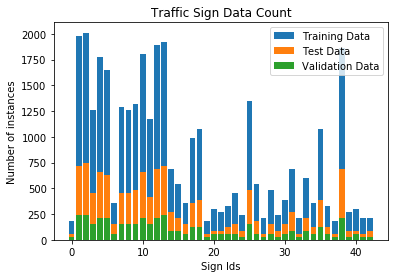

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

y_hist = np.bincount(y_train)
plt.ylabel('Number of instances')
plt.xlabel('Sign Ids')
plt.title('Traffic Sign Data Count')
p1 = plt.bar(np.unique(y_train), y_hist)
p2 = plt.bar(np.unique(y_test), np.bincount(y_test))
p3 = plt.bar(np.unique(y_valid), np.bincount(y_valid))
plt.legend((p1[0], p2[0], p3[0]), ('Training Data', 'Test Data', 'Validation Data'))
plt.show()



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate([y_train, y_valid, y_test])))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Augmentation

In [5]:
from albumentations import ShiftScaleRotate, RandomBrightnessContrast, Compose

aug_fn = Compose([
    ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=1),
    RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05, p=0.2)
])

def augment_data(X, y, times):
    X_aug_seq = [X]
    y_aug_seq = [y]
    for _ in range(times):
        X_aug_seq.append([aug_fn(image=im)['image'] for im in X])
        y_aug_seq.append(y)
    return np.concatenate(X_aug_seq), np.concatenate(y_aug_seq)

In [6]:
def write_data(X, y, path):
    with open(path, mode='wb') as f:
        pickle.dump({
           'features': X,
            'labels': y
        }, f)
        
def read_data(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
    return data['features'], data['labels']

<Figure size 432x288 with 0 Axes>

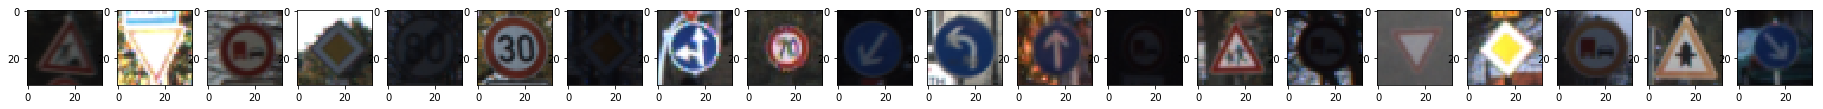

In [7]:
plt.tight_layout()

def visualize_samples(X, num=1, cmap=None):
    w, h, d = X[0].shape
    fig = plt.figure(num, figsize=(w, h))
    
    for i, img in enumerate(X[np.random.choice(len(X), size=num, replace=False)]):
        fig.add_subplot(1, num, i + 1)
        plt.imshow(img, cmap=cmap)
        
visualize_samples(X_train, 20)

In [8]:
training_aug_file = './train.aug.p'

try:
    X_train, y_train = read_data(training_aug_file)
    print('Data was read.')
except:
    target_freq = 500
    X_aug_seq = []
    y_aug_seq = []
    for y, freq in zip(np.unique(y_train), y_hist):
        times = int(target_freq // freq)
        xx, yy = augment_data(X_train[y_train == y], y_train[y_train == y], times=times)
        X_aug_seq.append(xx)
        y_aug_seq.append(yy)
    
    X_train, y_train = np.concatenate(X_aug_seq), np.concatenate(y_aug_seq)
    write_data(X_train, y_train, training_aug_file)
    print('Data was augmented.')

Data was augmented.


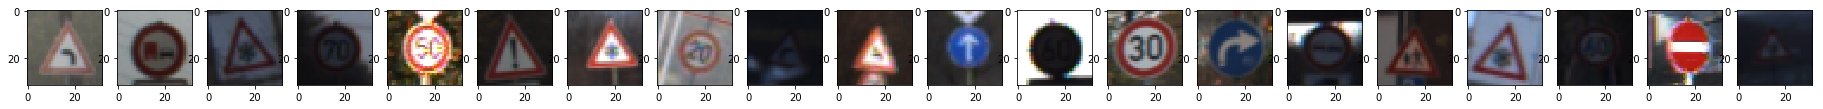

In [9]:
visualize_samples(X_train, 20)

<BarContainer object of 43 artists>

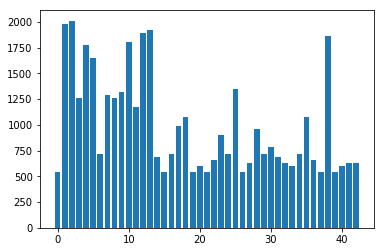

In [10]:
import matplotlib.pyplot as plt

y_hist= np.bincount(y_train)
plt.bar(np.unique(y_train), y_hist)

### Model Architecture

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    tconv1 = tf.layers.batch_normalization(conv1)

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    tconv2 = tf.layers.batch_normalization(conv2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    fc1 = tf.layers.batch_normalization(fc1)
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2 = tf.layers.batch_normalization(fc2)
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
          
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)

### Training Pipeline
Create a training pipeline that uses the model to classify Signs.

In [12]:
import tensorflow as tf

RATE = 0.00025
EPOCHS = 100
BATCH_SIZE = 256
L2_ALPHA = 0.1

# INITIAL_LEARNING_RATE = 0.1
# LEARNING_RATE_DECAY_FACTOR = 0.1
# decay_steps = int(272 * NUM_EPOCHS_PER_DECAY)

x = tf.placeholder(tf.float32, (None,) + X_train[0].shape)
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits, l2_loss = LeNet(x, keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) + L2_ALPHA * l2_loss
optimizer = tf.train.AdamOptimizer(learning_rate = RATE)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [13]:
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.
Save the model after training.

In [15]:
from sklearn.utils import shuffle

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter('./summary_logs/', sess.graph)
    
    print("Training...")
    print()
    for i in tnrange(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tnrange(0, X_train.shape[0], BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        print("EPOCH {} ...".format(i+1))
        if i % 5 == 0:
            validation_accuracy = evaluate(X_train, y_train)
            print("Train Accuracy = {:.3f}".format(validation_accuracy))
        if i % 1 == 0:
            validation_accuracy = evaluate(X_valid, y_valid)
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 1 ...
Train Accuracy = 0.051
Validation Accuracy = 0.066



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 2 ...
Validation Accuracy = 0.077



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 3 ...
Validation Accuracy = 0.080



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 4 ...
Validation Accuracy = 0.208



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 5 ...
Validation Accuracy = 0.285



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 6 ...
Train Accuracy = 0.416
Validation Accuracy = 0.442



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 7 ...
Validation Accuracy = 0.527



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 8 ...
Validation Accuracy = 0.588



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 9 ...
Validation Accuracy = 0.678



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 10 ...
Validation Accuracy = 0.695



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 11 ...
Train Accuracy = 0.743
Validation Accuracy = 0.755



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 12 ...
Validation Accuracy = 0.780



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 13 ...
Validation Accuracy = 0.804



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 14 ...
Validation Accuracy = 0.812



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 15 ...
Validation Accuracy = 0.835



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 16 ...
Train Accuracy = 0.845
Validation Accuracy = 0.837



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 17 ...
Validation Accuracy = 0.856



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 18 ...
Validation Accuracy = 0.857



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 19 ...
Validation Accuracy = 0.867



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 20 ...
Validation Accuracy = 0.872



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 21 ...
Train Accuracy = 0.890
Validation Accuracy = 0.882



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 22 ...
Validation Accuracy = 0.888



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 23 ...
Validation Accuracy = 0.896



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 24 ...
Validation Accuracy = 0.899



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 25 ...
Validation Accuracy = 0.883



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 26 ...
Train Accuracy = 0.903
Validation Accuracy = 0.895



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 27 ...
Validation Accuracy = 0.897



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 28 ...
Validation Accuracy = 0.904



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 29 ...
Validation Accuracy = 0.907



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 30 ...
Validation Accuracy = 0.918



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 31 ...
Train Accuracy = 0.911
Validation Accuracy = 0.901



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 32 ...
Validation Accuracy = 0.912



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 33 ...
Validation Accuracy = 0.905



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 34 ...
Validation Accuracy = 0.921



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 35 ...
Validation Accuracy = 0.919



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 36 ...
Train Accuracy = 0.927
Validation Accuracy = 0.910



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 37 ...
Validation Accuracy = 0.912



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 38 ...
Validation Accuracy = 0.916



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 39 ...
Validation Accuracy = 0.920



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 40 ...
Validation Accuracy = 0.924



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 41 ...
Train Accuracy = 0.941
Validation Accuracy = 0.924



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 42 ...
Validation Accuracy = 0.918



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 43 ...
Validation Accuracy = 0.922



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 44 ...
Validation Accuracy = 0.931



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 45 ...
Validation Accuracy = 0.920



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 46 ...
Train Accuracy = 0.944
Validation Accuracy = 0.924



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 47 ...
Validation Accuracy = 0.920



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 48 ...
Validation Accuracy = 0.922



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 49 ...
Validation Accuracy = 0.923



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 50 ...
Validation Accuracy = 0.929



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 51 ...
Train Accuracy = 0.952
Validation Accuracy = 0.935



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 52 ...
Validation Accuracy = 0.929



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 53 ...
Validation Accuracy = 0.935



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 54 ...
Validation Accuracy = 0.928



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 55 ...
Validation Accuracy = 0.932



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 56 ...
Train Accuracy = 0.947
Validation Accuracy = 0.924



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 57 ...
Validation Accuracy = 0.931



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 58 ...
Validation Accuracy = 0.929



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 59 ...
Validation Accuracy = 0.939



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 60 ...
Validation Accuracy = 0.935



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 61 ...
Train Accuracy = 0.959
Validation Accuracy = 0.938



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 62 ...
Validation Accuracy = 0.937



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 63 ...
Validation Accuracy = 0.932



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 64 ...
Validation Accuracy = 0.936



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 65 ...
Validation Accuracy = 0.930



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 66 ...
Train Accuracy = 0.960
Validation Accuracy = 0.937



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 67 ...
Validation Accuracy = 0.930



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 68 ...
Validation Accuracy = 0.937



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 69 ...
Validation Accuracy = 0.940



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 70 ...
Validation Accuracy = 0.929



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 71 ...
Train Accuracy = 0.963
Validation Accuracy = 0.935



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 72 ...
Validation Accuracy = 0.938



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 73 ...
Validation Accuracy = 0.943



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 74 ...
Validation Accuracy = 0.942



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 75 ...
Validation Accuracy = 0.938



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 76 ...
Train Accuracy = 0.959
Validation Accuracy = 0.932



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 77 ...
Validation Accuracy = 0.947



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 78 ...
Validation Accuracy = 0.936



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 79 ...
Validation Accuracy = 0.936



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 80 ...
Validation Accuracy = 0.938



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 81 ...
Train Accuracy = 0.964
Validation Accuracy = 0.934



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 82 ...
Validation Accuracy = 0.944



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 83 ...
Validation Accuracy = 0.943



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 84 ...
Validation Accuracy = 0.949



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 85 ...
Validation Accuracy = 0.948



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 86 ...
Train Accuracy = 0.968
Validation Accuracy = 0.952



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 87 ...
Validation Accuracy = 0.946



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 88 ...
Validation Accuracy = 0.944



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 89 ...
Validation Accuracy = 0.934



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 90 ...
Validation Accuracy = 0.934



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 91 ...
Train Accuracy = 0.963
Validation Accuracy = 0.943



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 92 ...
Validation Accuracy = 0.941



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 93 ...
Validation Accuracy = 0.944



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 94 ...
Validation Accuracy = 0.949



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 95 ...
Validation Accuracy = 0.942



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 96 ...
Train Accuracy = 0.964
Validation Accuracy = 0.932



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 97 ...
Validation Accuracy = 0.934



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 98 ...
Validation Accuracy = 0.945



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 99 ...
Validation Accuracy = 0.948



HBox(children=(IntProgress(value=0, max=167), HTML(value='')))

EPOCH 100 ...
Validation Accuracy = 0.943


Model saved


In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.920


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
def visualize_all(X, cmap=None):
    w, h, d = X[0].shape
    num = len(X)
    fig = plt.figure(num, figsize=(w, h))
    
    for i, img in enumerate(X):
        fig.add_subplot(1, num, i + 1)
        plt.imshow(img, cmap=cmap)

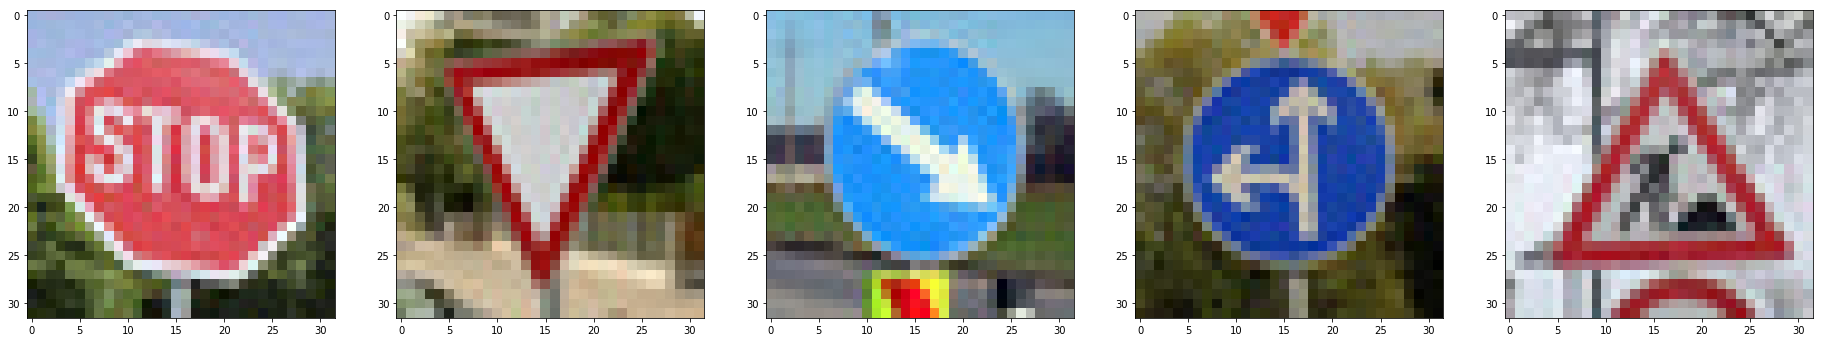

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
import glob

X_real = []
for filename in glob.glob('real_images/*.jpg'):
    X_real.append(np.array(Image.open(filename)))
    
X_real = np.stack(X_real, axis=0)
y_real = [14, 13, 38, 37, 25]
visualize_all(X_real)

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_pred = sess.run(logits, feed_dict={x: X_real, keep_prob: 1})

INFO:tensorflow:Restoring parameters from ./lenet


In [28]:
import pandas as pd
df  = pd.read_csv('signnames.csv')

In [29]:
for ClassId_pred in np.argmax(softmax_pred, axis=1):
    print(df.loc[df['ClassId'] == ClassId_pred])

    ClassId SignName
14       14     Stop
    ClassId SignName
13       13    Yield
    ClassId    SignName
38       38  Keep right
    ClassId             SignName
37       37  Go straight or left
    ClassId   SignName
25       25  Road work


### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
f"{np.count_nonzero(y_real == np.argmax(softmax_pred, axis=1)) / len(y_real) * 100}%"

'100.0%'

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: X_real, keep_prob: 1})
print(top_k_pred)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[9.9866104e-01, 3.8882796e-04, 2.8313600e-04, 1.6718905e-04,
        1.2631495e-04],
       [1.0000000e+00, 8.9490948e-09, 1.3019656e-09, 1.7492965e-11,
        1.5178917e-11],
       [9.9760133e-01, 2.3888899e-03, 9.8036944e-06, 2.4320450e-08,
        1.0083272e-08],
       [9.9995899e-01, 3.3538792e-05, 5.4785569e-06, 1.1105933e-06,
        9.3027649e-07],
       [9.9999774e-01, 1.4776624e-06, 6.0761471e-07, 4.0976012e-08,
        3.4320820e-08]], dtype=float32), indices=array([[14, 17, 12, 13, 29],
       [13,  2, 32, 36,  3],
       [38, 34, 36, 40, 35],
       [37, 40, 39, 33, 35],
       [25, 22, 24, 29, 30]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")